# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a CNN model that can recognize the digits in the images.


## **Mount the drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the the train and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

checking the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Visualizing the first 10 images in X_train.
- Printing the 10 first labels from Y_train.

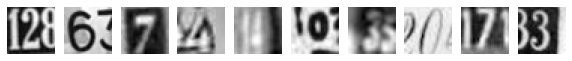

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)
    
    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Printing the shape and the array of pixels for the first image in the training dataset.
- Reshaping the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalizing the train and the test dataset by dividing by 255.
- Printing the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
# Printing the new shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [ ]:
# one-hot encode

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**

 - First Convolutional layer with **16 filters and the kernel size of 3x3**. **'same' padding** and **input shape = (32, 32, 1)**
 - **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Adding a **dense layer with 32 nodes**
 - Adding a **LeakyRelu layer with the slope equal to 0.1**
 - Adding the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compaling the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**.
- Printing the summary of the model after assigning it to a new variable.
- Fitting the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**.

In [ ]:
from sklearn import metrics


def cnn_model_1():

    model = Sequential() 
    
    # Model Architecture 

    model.add(Conv2D(16, kernel_size = (3,3), padding='same', input_shape= (32,32,1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(32, kernel_size = (3,3), padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dense(10, activation='softmax'))
    
    # Compile the model

    model.compile(loss = 'categorical_crossentropy', optimizer= Adam(learning_rate = 0.001), metrics = 'accuracy')
    
    return model

In [ ]:
# Building the model (assigning it to a variable)

model_1 = cnn_model_1()

In [ ]:
# Printing the model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# Fitting the model

history_model_1 = model_1.fit(X_train,
                              
                              y_train,
                              
                              batch_size = 32,
                              
                              validation_split = 0.2,
                              
                              epochs = 20,
                              
                              verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 11s 10ms/step - loss: 1.1958 - accuracy: 0.6023 - val_loss: 0.6462 - val_accuracy: 0.8136
Epoch 2/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.5336 - accuracy: 0.8472 - val_loss: 0.5202 - val_accuracy: 0.8523
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4410 - accuracy: 0.8704 - val_loss: 0.4966 - val_accuracy: 0.8589
Epoch 4/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3835 - accuracy: 0.8889 - val_loss: 0.4564 - val_accuracy: 0.8726
Epoch 5/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3429 - accuracy: 0.8981 - val_loss: 0.4658 - val_accuracy: 0.8713
Epoch 6/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3023 - accuracy: 0.9094 - val_loss: 0.4553 - val_accuracy: 0.8737
Epoch 7/20
1050/1050 [==============================] - 11s 10ms/step - loss: 0.2723 - accuracy: 0.9174 - val_loss: 0.4563 - va

### **Plotting the validation and training accuracies**

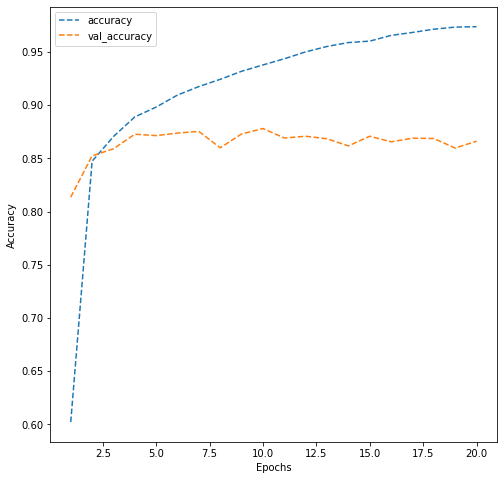

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The accuracy of the training set increase with the increase of the epochs and have a great accuracy of 97%
- In the other hand the accuracy of the validation set is constant
- this might be due to two reasons: the first one being that the validation set sample is small in comparation, and second our model is overfitting (when our model is overfitting the traninig data will perform well while the validation data won't, this means that our model is not generalized and won't work well with unseen data)

- To overcome this we build another model and see if we can get a better model with generalized performance.

- First, we need to clear the previous model's history from the Keras backend.
- We need to fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**


 - First Convolutional layer with **16 filters and the kernel size of 3x3**. **'same' padding** and **input shape = (32, 32, 1)**
 - Add **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Adding **LeakyRelu** with the **slope equal to 0.1**
 - Adding a **max-pooling layer** with a **pool size of 2x2**
 - Adding a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Adding a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Adding a **LeakyRelu layer with the slope equal to 0.1**
 - Adding a **max-pooling layer** with a **pool size of 2x2**
 - Adding a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Adding a **dense layer with 32 nodes**
 - Adding a **LeakyRelu layer with the slope equal to 0.1**
 - Adding a **dropout layer with the rate equal to 0.5**
 - Adding the final **output layer with nodes equal to the number of classes  = 10** and **'softmax' as the activation function**
 - Compiling the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**.
- Print the summary of the model after assigning it to a variable.
- Fitting the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**.

In [ ]:


def cnn_model_2():
    
    model = Sequential()
    
    # Model Architecture 

    model.add(Conv2D(16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size = (2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = 'accuracy')
    
    return model

In [ ]:
# Build the model

model_2 = cnn_model_2()

In [ ]:
# Print the summary

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                      

In [ ]:
# Fitting the model

history_model_2 = model_2.fit(X_train,
                              
                              y_train,
                              
                              batch_size = 128,
                              
                              validation_split = 0.2,
                              
                              epochs = 30,
                              
                              verbose = 1)

Epoch 1/30
263/263 [==============================] - 7s 23ms/step - loss: 1.3795 - accuracy: 0.5320 - val_loss: 2.2060 - val_accuracy: 0.2362
Epoch 2/30
263/263 [==============================] - 6s 21ms/step - loss: 0.6871 - accuracy: 0.7902 - val_loss: 0.5356 - val_accuracy: 0.8462
Epoch 3/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5707 - accuracy: 0.8267 - val_loss: 0.5504 - val_accuracy: 0.8486
Epoch 4/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5044 - accuracy: 0.8464 - val_loss: 0.4070 - val_accuracy: 0.8844
Epoch 5/30
263/263 [==============================] - 6s 21ms/step - loss: 0.4549 - accuracy: 0.8605 - val_loss: 0.6746 - val_accuracy: 0.7833
Epoch 6/30
263/263 [==============================] - 6s 21ms/step - loss: 0.4258 - accuracy: 0.8694 - val_loss: 0.3797 - val_accuracy: 0.8900
Epoch 7/30
263/263 [==============================] - 6s 21ms/step - loss: 0.3893 - accuracy: 0.8787 - val_loss: 0.4301 - val_accuracy: 0.8794

### **Plotting the validation and training accuracies**

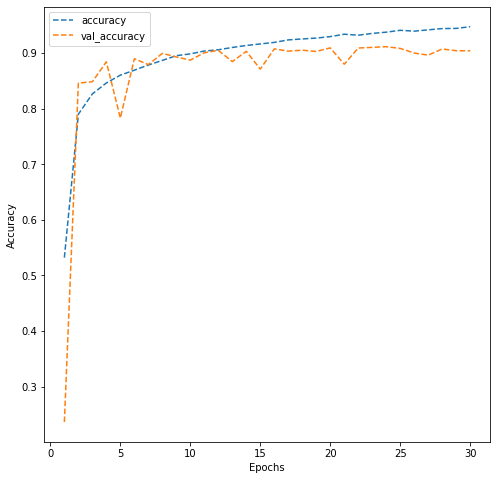

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The accuracy of the training data decreased from 97% to 94% but the accuracy of our validation data has increase constantly with the number of epochs and is close to the training one.
- given the fact that both accuracy are almost the same, this indicates that the performance of the model has increase significantly and therefore will work well with unseen data.

## **Predictions on the test data**


In [ ]:
# using model_2 for prediction as this is the better model

test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

**Note:** noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of **y_test** to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1814
           1       0.94      0.85      0.89      1828
           2       0.89      0.93      0.91      1803
           3       0.85      0.88      0.87      1719
           4       0.91      0.91      0.91      1812
           5       0.87      0.92      0.89      1768
           6       0.92      0.87      0.89      1832
           7       0.91      0.93      0.92      1808
           8       0.91      0.87      0.89      1812
           9       0.89      0.90      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



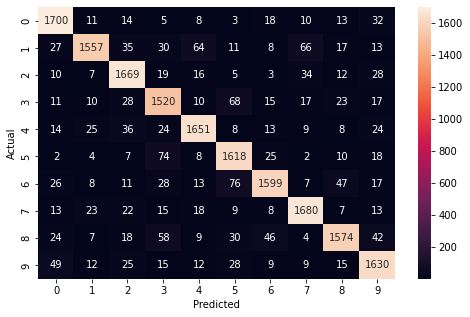

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
- We can conclude that our second model is performing better than the first model, and we have a overall accuracy of 90%.
- The performing of the model can be further improve, to do so would be neccesary to play around with the hyper-parameters in order to accomplish it.